In [1]:
import numpy as np
import pandas as pd

In [12]:
df_raw = pd.read_csv('/Users/dileepsathyan/Documents/GitHub/datasets/ts_covid19_confirmed_global.csv')
df_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [15]:
df_raw = df_raw.dropna(axis=1)
df_raw.shape

(266, 191)

In [16]:
# Remove the unnecessary columns (Lat and Long)

df_raw = df_raw.drop(columns=['Lat', 'Long'])
df_raw.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,Albania,0,0,0,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,Algeria,0,0,0,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,Andorra,0,0,0,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,Angola,0,0,0,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


## 1. Group by the country and sum the total counts in Descending order.

In [21]:
df1 = df_raw.copy()
df1['Row_Totals'] = df1.sum(axis=1)
df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,Row_Totals
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,35475,35526,35615,35727,35928,35981,36036,36157,36263,1936390
1,Albania,0,0,0,0,0,0,0,0,0,...,4090,4171,4290,4358,4466,4570,4637,4763,4880,196702
2,Algeria,0,0,0,0,0,0,0,0,0,...,23084,23691,24278,24872,25484,26159,26764,27357,27973,1179755
3,Andorra,0,0,0,0,0,0,0,0,0,...,880,884,884,889,889,897,897,897,907,94404
4,Angola,0,0,0,0,0,0,0,0,0,...,705,749,779,812,851,880,916,932,950,22662


In [25]:
# Subset the dataframe to contain only relevant fields

df1 = df1[["Country/Region", "Row_Totals"]]
df1.head()

,Country/Region,Row_Totals
0,Afghanistan,1936390
1,Albania,196702
2,Algeria,1179755
3,Andorra,94404
4,Angola,22662


In [30]:
# Group by the country and find the totals

df2 = df1.groupby(['Country/Region']).sum()
df2 = df2.sort_values('Row_Totals', ascending=False)
df2.reset_index(inplace=True)
df2

,Country/Region,Row_Totals
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
...,...,...
183,Saint Kitts and Nevis,1772
184,Holy See,1356
185,Papua New Guinea,1185
186,MS Zaandam,1070


In [32]:
print(f'The Country with Highest Covid Cases: {df2["Country/Region"][0]}. \nThe Country with Lowest Covid Cases: {df2["Country/Region"][187]}.')

The Country with Highest Covid Cases: US. 
The Country with Lowest Covid Cases: Western Sahara.


## Create a new data frame with two columns (date and the total sum of counts of the cases )and sort them in decreasing order.

In [62]:
df_date_qty = df_raw.copy()
df_date_qty.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,Albania,0,0,0,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,Algeria,0,0,0,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,Andorra,0,0,0,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,Angola,0,0,0,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [63]:
# Subset the dataframe to contain only dates and counts

df_date_qty = df_date_qty.drop(columns='Country/Region')
df_date_qty.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,0,0,0,0,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,0,0,0,0,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,0,0,0,0,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,0,0,0,0,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,0,0,0,0,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [64]:
# Pivot the dataframe to have dates as rows
df_date_qty = df_date_qty.T
df_date_qty['Date_Total'] = df_date_qty.sum(axis=1)
df_date_qty

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,Date_Total
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,654
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,941
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1434
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/23/20,35928,4466,25484,889,851,76,148027,36162,113,3640,...,13,4,2239,10,749,1654,340,7060,359,15511225
7/24/20,35981,4570,26159,897,880,82,153520,36613,113,3654,...,13,4,2258,10,860,1674,340,7104,359,15792390
7/25/20,36036,4637,26764,897,916,82,158334,36996,113,3668,...,13,4,2258,10,862,1674,340,7150,419,16047935
7/26/20,36157,4763,27357,897,932,82,162526,37317,113,3685,...,13,4,2262,10,863,1681,354,7192,505,16252541


In [65]:
df_date_qty = df_date_qty['Date_Total']
df_date_qty.head()

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
Name: Date_Total, dtype: int64

In [61]:
df_date_qty = df_date_qty.sort_values(ascending=False)
df_date_qty

7/27/20    16481230
7/26/20    16252541
7/25/20    16047935
7/24/20    15792390
7/23/20    15511225
             ...   
1/26/20        2118
1/25/20        1434
1/24/20         941
1/23/20         654
1/22/20         555
Name: Date_Total, Length: 188, dtype: int64

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

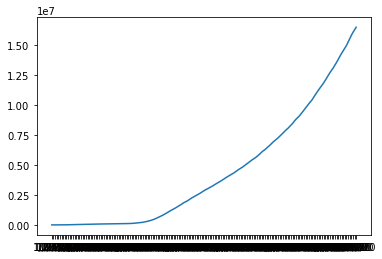

In [67]:
plt.plot(df_date_qty)

# Machine Learning Concepts

## Linear Regression Model

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [69]:
df_fish_raw = pd.read_csv("/Users/dileepsathyan/Documents/GitHub/datasets/Fish.csv")
df_fish_raw.head()

,Species,Weight,Length,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


In [70]:
df_fish_raw["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [71]:
df_fish_smelt = df_fish_raw[df_fish_raw["Species"] == "Smelt"]
df_fish_smelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 145 to 158
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  14 non-null     object 
 1   Weight   14 non-null     float64
 2   Length   14 non-null     float64
 3   Height   14 non-null     float64
 4   Width    14 non-null     float64
dtypes: float64(4), object(1)
memory usage: 672.0+ bytes


In [72]:
x = df_fish_smelt[["Length", "Height", "Width"]]
y = df_fish_smelt["Weight"]

In [73]:
lm1 = LinearRegression()
lm1.fit(x, y)

LinearRegression()

In [74]:
r2 = lm1.score(x, y)
coeff = lm1.coef_
interc = lm1.intercept_

print(f'R-Squared value: {r2}, \nCoeff value: {coeff}, \nIntercept value: {interc}')

R-Squared value: 0.9720674202296953, 
Coeff value: [1.28668005 3.49748069 5.1106335 ], 
Intercept value: -17.881727047025727


In [75]:
y_pred = lm1.predict(x)
df_fish_smelt["Weight_Pred"] = y_pred
df_fish_smelt

<ipython-input-75-491fa6126e76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fish_smelt["Weight_Pred"] = y_pred


,Species,Weight,Length,Height,Width,Weight_Pred
145,Smelt,6.7,9.3,1.7388,1.0476,5.519716
146,Smelt,7.5,10.0,1.9720,1.1600,7.810440
147,Smelt,7.0,10.1,1.7284,1.1484,7.027839
148,Smelt,9.7,10.4,2.1960,1.3800,10.232887
149,Smelt,9.8,10.7,2.0832,1.2772,9.699002
150,Smelt,8.7,10.8,1.9782,1.2852,9.501320
151,Smelt,10.0,11.3,2.2139,1.2838,10.961861
152,Smelt,9.9,11.3,2.2139,1.1659,10.359318
153,Smelt,9.8,11.4,2.2044,1.1484,10.365323
154,Smelt,12.2,11.5,2.0904,1.3936,11.348406


## OLS Regression from Statsmodels

In [76]:
import statsmodels.api as sm

In [77]:
ols1 = sm.OLS(y, x)
res1 = ols1.fit()

In [80]:
r2 = res1.rsquared
r2_adj = res1.rsquared_adj
coeff = res1.params

print(f'R-Squared value: {r2}, \nAdjusted R-SQuared value: {r2_adj}, \nCoeff value: {coeff}')

R-Squared value: 0.981494270979193, 
Adjusted R-SQuared value: 0.9764472539735183, 
Coeff value: Length   -1.709310
Height    9.745520
Width     6.723424
dtype: float64


In [81]:
res1.summary()

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              194.5
Date:                Fri, 29 Jul 2022   Prob (F-statistic):                    8.27e-10
Time:                        09:32:48   Log-Likelihood:                         -26.569
No. Observations:                  14   AIC:                                      59.14
Df Residuals:                      11   BIC:                                      61.06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Length        -1.7093      0.667     -2.562      0.026      -3.178      -0.241
Height         9.7455      4.317      2.257      0.045       0.244      19.247
Width          6.7234      3.502      1.920      0.081      -0.984      14.431
==============================================================================
Omnibus:                        0.090   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.313
Skew:                          -0.067   Prob(JB):                        0.855
Kurtosis:                       2.280   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression (Classification Model)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
df_log_raw = pd.read_csv("/Users/dileepsathyan/Documents/GitHub/datasets/logistic_regression_dataset.csv")
df_log_raw.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [84]:
x = df_log_raw[["Age", "EstimatedSalary"]]
y = df_log_raw["Purchased"]

In [85]:
logm1 = LogisticRegression(solver='liblinear', random_state=10)
logm1.fit(x, y)

LogisticRegression(random_state=10, solver='liblinear')

In [86]:
logm1.classes_

array([0, 1])

In [87]:
logm1.intercept_

array([-0.00510052])

In [88]:
logm1.coef_

array([[-5.88775639e-03, -9.74009872e-09]])

In [91]:
y_pred = logm1.predict(x)
df_log_raw["Purch_Pred"] = y_pred
df_log_raw

,User ID,Gender,Age,EstimatedSalary,Purchased,Purch_Pred
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,0
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,0


In [92]:
logm1.score(x, y)

0.6425

In [93]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

In [94]:
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[257,   0],
       [143,   0]])

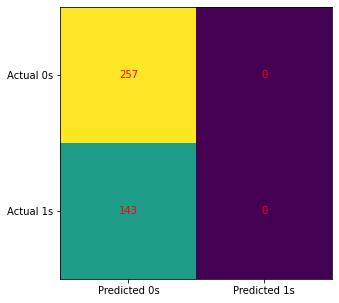

In [99]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(conf_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')
plt.show()

In [125]:
train, test = train_test_split(df_log_raw, train_size = 0.7, test_size = 0.3, random_state = 100)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [126]:
train

,User ID,Gender,Age,EstimatedSalary,Purchased,Purch_Pred
234,15619407,Female,38,112000,0,0
45,15639277,Male,23,20000,0,0
171,15570932,Male,34,115000,0,0
47,15776348,Female,27,54000,0,0
265,15801336,Female,42,108000,1,0
...,...,...,...,...,...,...
343,15629739,Female,47,51000,1,0
359,15709183,Male,42,54000,0,0
323,15619465,Female,48,30000,1,0
280,15609669,Female,59,88000,1,0


In [127]:
# Find the outlier

q1 = train['EstimatedSalary'].quantile(.25)
q3 = train['EstimatedSalary'].quantile(.75)

In [129]:
iqr = q3 - q1
min_limit = q1 - (1.5 * iqr)
max_limit = q3 + (1.5 * iqr)

In [130]:
outlier_list = []
for sal in train['EstimatedSalary']:
    if sal < min_limit or sal > max_limit:
        outlier_list.append(sal)
    else:
        pass
outliers = pd.Series(outlier_list)
outliers    

<ipython-input-130-ba21f4c9eacb>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  outliers = pd.Series(outlier_list)


Series([], dtype: float64)

In [131]:
df_sample = pd.DataFrame([1,2,3,4,5,6,7,8,9])
df_sample

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [137]:
df_sample[~df_sample[0].isin([2,4,6,8])]

,0
0,1
2,3
4,5
6,7
8,9


In [138]:
df_sample[df_sample[0].isin([2,4,6,8])]

,0
1,2
3,4
5,6
7,8


## House Price Pediction model

In [139]:
df_house = pd.read_csv("/Users/dileepsathyan/Documents/GitHub/datasets/kc_house_data.csv")
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [140]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [141]:
# Data Manipulation

from datetime import datetime as dt

df_house["date"] = pd.to_datetime(df_house["date"])
df_house["year"] = df_house["date"].dt.year
df_house["month"] = df_house["date"].dt.month
df_house["day"] = df_house["date"].dt.day

df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [142]:
df_house["house_age"] = df_house["year"] - df_house["yr_built"]
df_house[['yr_built', 'year', 'house_age']]

,yr_built,year,house_age
0,1955,2014,59
1,1951,2014,63
2,1933,2015,82
3,1965,2014,49
4,1987,2015,28
...,...,...,...
21608,2009,2014,5
21609,2014,2015,1
21610,2009,2014,5
21611,2004,2015,11


In [144]:
df_house["renovated_flag"] = np.where(df_house["yr_renovated"]==0, 0, 1)
df_house[["yr_renovated", "renovated_flag"]]

,yr_renovated,renovated_flag
0,0,0
1,1991,1
2,0,0
3,0,0
4,0,0
...,...,...
21608,0,0
21609,0,0
21610,0,0
21611,0,0


In [145]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'house_age', 'renovated_flag'],
      dtype='object')

In [156]:
corr_fields = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
            'lat', 'long', 'sqft_living15', 'sqft_lot15']

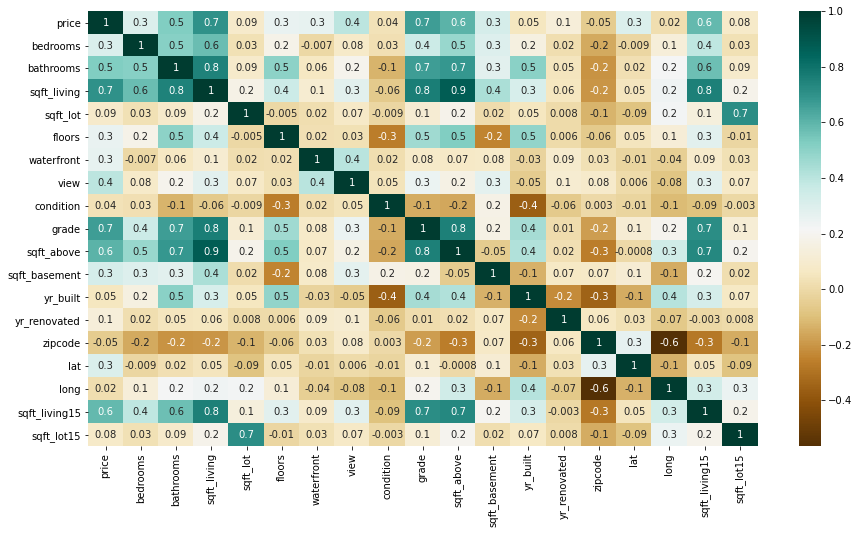

None


In [155]:
# Visualize the correlation values using seaborn
plt.figure(figsize=(15,8))
sns.heatmap(df_house[corr_fields].corr(),annot=True,cmap='BrBG', fmt=".1g")
print(plt.show())

In [158]:
df_house[corr_fields].corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [150]:
def create_boxplot(df, col):
    sns.boxplot(df[col], df_house['price'])

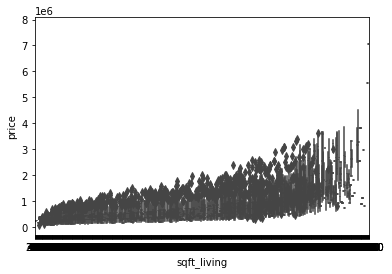

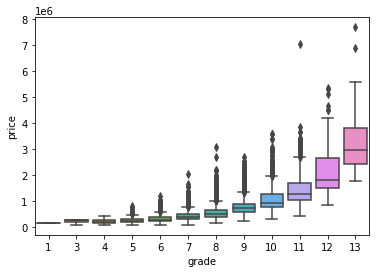

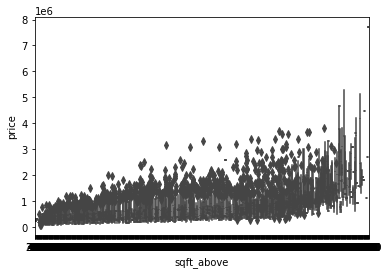

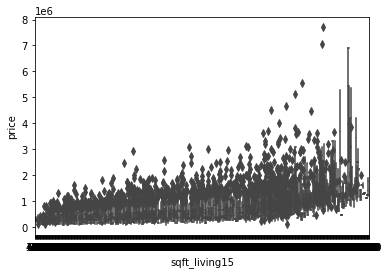

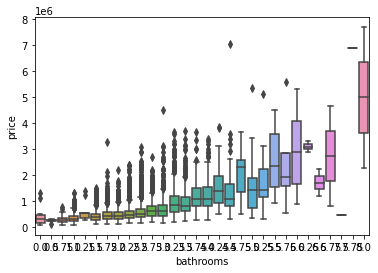

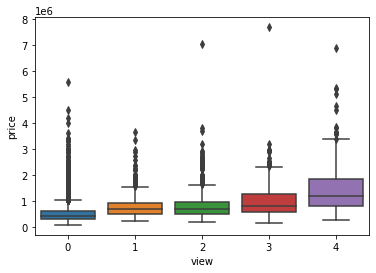

In [159]:
cols = ["sqft_living", "grade", "bathrooms", "view"]

for col in cols:
    create_boxplot(df_house, col)
    plt.show()

In [167]:
cols = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']
df_house = df_house.drop(['id', 'date', 'year', 'yr_built', 'yr_renovated'], axis=1)

In [168]:
def remove_outliers(dfx, col):
    q1 = dfx[col].quantile(0.25)
    q3 = dfx[col].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - (1.5 *iqr)
    max_limit = q3 + (1.5 *iqr)

    outliers_list = []
    for i in dfx[col]:
        if i < min_limit or i > max_limit:
            outliers_list.append(i)
        else:
            pass
    outliers = pd.Series(outliers_list)
    df_cleaned = dfx[~dfx[col].isin(outliers)]
    return df_cleaned


for col in df_house.columns:
    df_house = remove_outliers(df_house, col)

<ipython-input-168-451d289ffe51>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  outliers = pd.Series(outliers_list)


In [169]:
# Prepare the X and y variables from the dataset
X = df_house.drop(['price'], axis=1)
y = df_house['price']

In [170]:
# Separate the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [171]:
# Create a model and fit it with the train set.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [174]:
# Predict the results from the model using the test set.
y_predicted = model.predict(X_test)


# Find the mean squared error and r2 values
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)


# Print the coeffients, intercepts, MSE and r2 values
print(f'Model Coeff: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Value: {r2}')


Model Coeff: [-6.44179707e+03  1.64501421e+04  5.22213808e+01 -3.01191437e+00
  4.56198850e+03  5.41461986e-09 -2.46473064e-10  2.42222532e+04
  6.93960131e+04  2.51613348e+01  2.70600460e+01 -2.27675189e+02
  5.10651079e+05  3.34140464e+04  5.02385975e+01 -7.53967173e+00
 -2.01857548e+03 -1.95628735e+02  1.80829833e+03  0.00000000e+00]
Model Intercept: 1726609.6833740165
Mean Squared Error: 8589501373.594966
R Squared Value: 0.6549284010714915


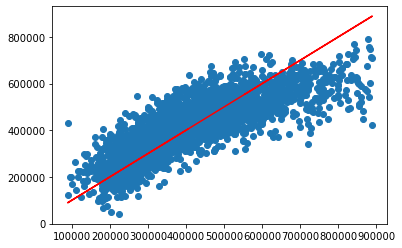

In [175]:
# Plot the results
plt.scatter(y_test, y_predicted)
plt.plot(y_test, y_test, 'r')
plt.show()

## Clustering (Kmodes)

In [186]:
df_mall = pd.read_csv("/Users/dileepsathyan/Documents/GitHub/datasets/mall_customers.csv")
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


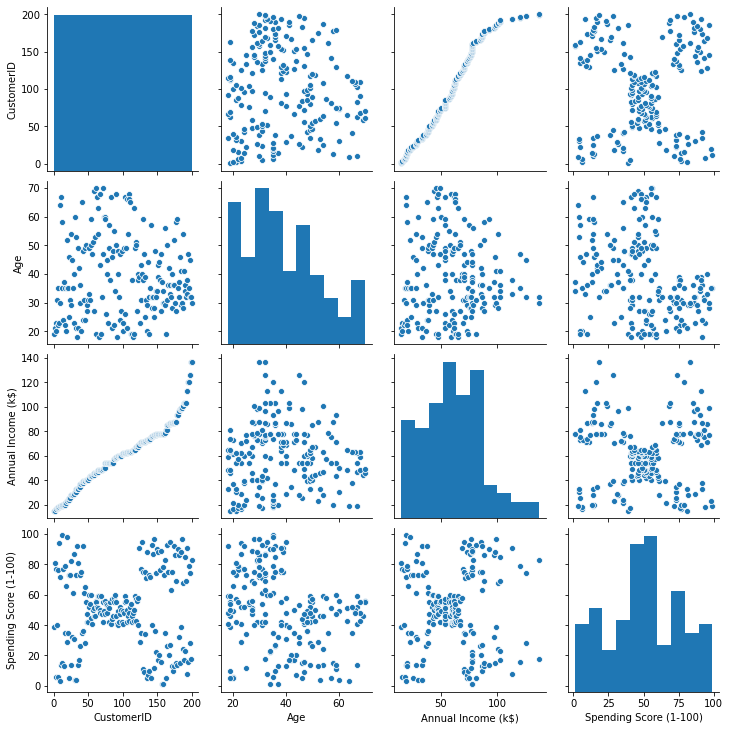

In [177]:
# sns pair plot

sns.pairplot(df_mall)

In [187]:
df_mall = df_mall.replace({"Gender": {"Male": 1, "Female": 0}})
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [188]:
# ELBOW Method:

from sklearn.cluster import KMeans


attempts = range(1,8)
wss = []
for k in attempts:
    km_elb = KMeans(n_clusters=k, init='k-means++')
    km_elb.fit(df_mall)
    wss_iter = km_elb.inertia_
    wss.append(wss_iter)

temp_df = pd.DataFrame({'cluster': attempts, 'wss': wss})
temp_df

,cluster,wss
0,1,975512.060000
1,2,387065.713771
2,3,271396.562966
3,4,195401.198560
4,5,157505.720725
5,6,122670.552668
6,7,103233.097885


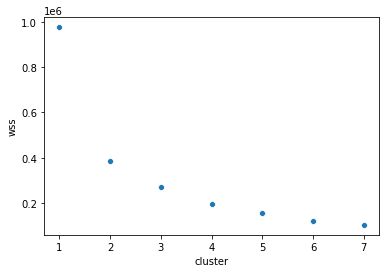

In [189]:
# Plot the elbow wss scores

sns.scatterplot(temp_df.cluster, temp_df.wss)

In [191]:
# SILHOUETTE Method

from sklearn import metrics

for k in range (2, 10):
    km_silh = KMeans(n_clusters=k, init='k-means++', random_state=100)
    km_silh.fit(df_mall)
    labels = km_silh.labels_
    silh_score = metrics.silhouette_score(df_mall, labels, metric='euclidean', sample_size=200, random_state=100)
    print(f'Silhouette Score for {k} clusters: {silh_score}')

Silhouette Score for 2 clusters: 0.47930490174235624
Silhouette Score for 3 clusters: 0.3749762788649241
Silhouette Score for 4 clusters: 0.4215331184039924
Silhouette Score for 5 clusters: 0.4203752534743267
Silhouette Score for 6 clusters: 0.40952809104457394
Silhouette Score for 7 clusters: 0.4073747089960844
Silhouette Score for 8 clusters: 0.40550215828085007
Silhouette Score for 9 clusters: 0.4003979316721138


In [192]:
km_cluster = KMeans(n_clusters=5, init='k-means++')
km_cluster.fit(df_mall)

df_mall["cluster"] = km_cluster.labels_
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


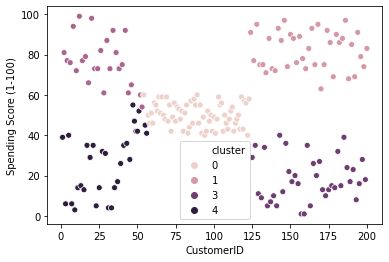

In [196]:
sns.scatterplot(df_mall['CustomerID'], df_mall['Spending Score (1-100)'], hue=df_mall['cluster'])